In [105]:
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\minji\AppData\Local\Temp/ipykernel_3284/3997487181.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [51]:
# create data

nPerClust = 100
blur = 1 # how spread out data are from the cluster mean

A = [1, 1]
B = [5, 1]

a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

data_np = np.hstack((a, b)).T
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

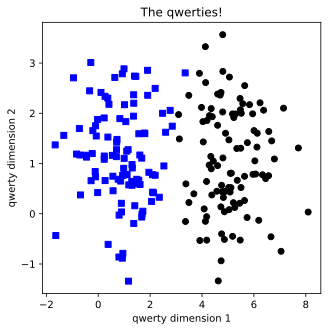

In [52]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [53]:
# build the model
ANNclassify = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid()
)

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [54]:
learningRate = .01
loss_func = nn.BCELoss()
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

In [55]:
# train the model
num_epochs = 5000
losses = torch.zeros(num_epochs)

print(data.shape)
print(labels.shape)

for epoch_i in range(num_epochs):
    y_pred = ANNclassify(data)
    
    loss = loss_func(y_pred, labels)
    losses[epoch_i] = loss
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

torch.Size([200, 2])
torch.Size([200, 1])


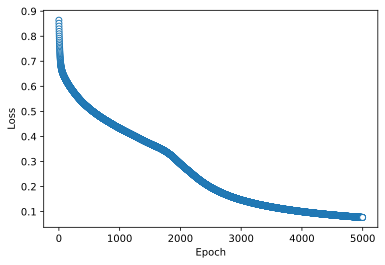

In [56]:
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [57]:
# compute the predictions

# manually compute losses
# final forward pass
predictions = ANNclassify(data)
predlabels = predictions > 0.5 # binarizing the output

misclassified = np.where(predlabels != labels)[0]

totalacc = 100-100*len(misclassified)/(2*nPerClust)
print(f"Final accuracy: {totalacc}%")

Final accuracy: 99.5%


In [62]:
for p in ANNclassify.parameters():
    print(p)

Parameter containing:
tensor([[-0.8046,  0.2014]], requires_grad=True)
Parameter containing:
tensor([2.9498], requires_grad=True)
Parameter containing:
tensor([[-3.0695]], requires_grad=True)
Parameter containing:
tensor([2.4241], requires_grad=True)


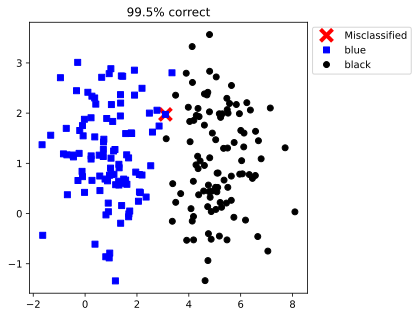

In [60]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0], data[misclassified,1], 'rx', markersize=12, markeredgewidth=4)
plt.plot(data[np.where(~predlabels)[0],0], data[np.where(~predlabels)[0],1], 'bs')
plt.plot(data[np.where(predlabels)[0],0], data[np.where(predlabels)[0],1], 'ko')

plt.legend(['Misclassified', 'blue', 'black'], bbox_to_anchor=(1,1))
plt.title(f"{totalacc}% correct")
plt.show()

In [80]:
data = []
for x in np.linspace(-8, 8, 50):
    for y in np.linspace(-3, 3, 50):
        data.append([x, y])

data = torch.tensor(data).float()
z = ANNclassify(data)
xyz = torch.hstack((data, z))
xyz = xyz.detach()

In [165]:
x = np.arange(-8, 8, 0.1)
y = np.arange(-8, 8, 0.1)
xx, yy = np.meshgrid(x, y)
z = []

for x_val, y_val in zip(np.reshape(xx, (-1,)), np.reshape(yy, (-1,))):
    z.append(ANNclassify(torch.tensor((x_val, y_val)).float()).item())

z = np.array(z)
z = np.reshape(z, (-1,1))
z.shape

(25600, 1)

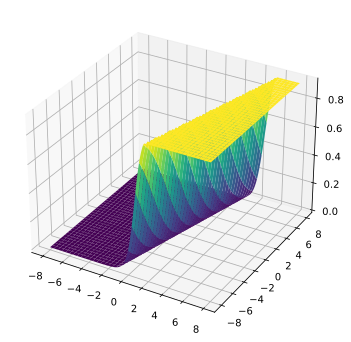

In [167]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xx, yy, np.reshape(z, (160,160)), cmap='viridis')